<a href="https://colab.research.google.com/github/Assassinkit/Model-Training---1/blob/main/Model_Training_for_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load, Train and Tune your Data for Estimated Quotation**

# **Load Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

path = "/content/drive/MyDrive/Dataset/estimated_data.csv"
# Ensure the file path includes the .csv extension
df = pd.read_csv(path)

# Display the first few rows of the dataframe
# df.head()

# Display the dataframe
df

,id,quotationId,sectionName,cost,ETA,parentSectionId
0,1,1,Design,10000,15,NaN
1,2,1,Wireframes,3000,5,1.0
2,3,1,Mockups,7000,10,1.0
3,4,1,Development,30000,30,NaN
4,5,1,Frontend,15000,15,4.0
5,6,1,Backend,15000,15,4.0
6,7,1,Testing,10000,15,NaN
7,8,2,UI/UX Design,12000,20,NaN
8,9,2,Prototyping,4000,5,8.0
9,10,2,Visual Design,8000,15,8.0


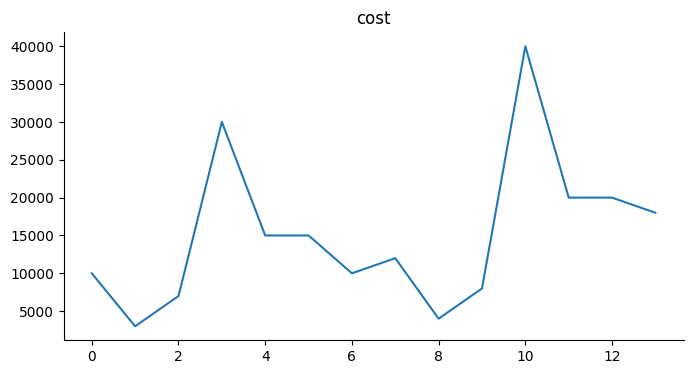

In [9]:
# @title Cost

from matplotlib import pyplot as plt
df['cost'].plot(kind='line', figsize=(8, 4), title='cost')
plt.gca().spines[['top', 'right']].set_visible(False)

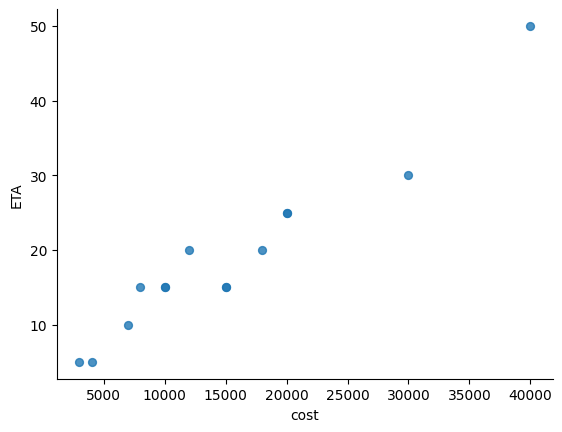

In [5]:
# @title cost vs ETA

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='cost', y='ETA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Data Preparation**

### **Data Separation as X and Y**

In [15]:
# Handle missing values in parentSectionId (filling with 0 as a placeholder)
df['parentSectionId'] = df['parentSectionId'].fillna(0)

# Features (X) and target (y)
x = df[['ETA', 'quotationId', 'parentSectionId']]
y = df['cost']

### **Split the Data into Training and Testing Sets**

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [23]:
x_train

,ETA,quotationId,parentSectionId
1,5,1,1.0
9,15,2,8.0
4,15,1,4.0
6,15,1,0.0
2,10,1,1.0
0,15,1,0.0
10,50,2,0.0
7,20,2,0.0
3,30,1,0.0
13,20,2,0.0


In [22]:
x_test

,ETA,quotationId,parentSectionId
11,25,2,11.0
12,25,2,11.0
5,15,1,4.0


In [29]:
y_train

,cost
1,3000
9,8000
4,15000
6,10000
2,7000
0,10000
10,40000
7,12000
3,30000
13,18000


In [30]:
y_test

,cost
11,20000
12,20000
5,15000


# **Build and Train the Models**

##**Linear Regression Model**

###**Training the model**

In [59]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(x_train, y_train)


LinearRegression()

###**Applying the model to make a prediction**

In [60]:
# Make predictions
y_pred_lr_train = lr_model.predict(x_train)
y_pred_lr_test = lr_model.predict(x_test)

In [61]:
y_pred_lr_train

array([ 3262.06604572, 11005.0804403 , 13169.77138019, 12276.74287327,
        7881.03302286, 12276.74287327, 41551.79226644, 13837.99040361,
       26133.64380469, 13837.99040361,  1767.14648603])

In [62]:
y_pred_lr_test

array([20912.78577477, 20912.78577477, 13169.77138019])

###**Evaluate model performance**

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

# Make Prediction and Evaluate the model performance
# Train
lr_train_mse = mean_squared_error(y_train, y_pred_lr_train)
lr_train_r2 = r2_score(y_train, y_pred_lr_train)

# Test
lr_test_mse = mean_squared_error(y_test, y_pred_lr_test)
lr_test_r2 = r2_score(y_test, y_pred_lr_test)


In [64]:
# Print out the Result for the Model Performance
# Train
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
# Test
print(f"Linear Regression - Mean Squared Error: {lr_test_mse}")
print(f"Linear Regression - R2 Score: {lr_test_r2}")

LR MSE (Train):  6057745.105585917
LR R2 (Train):  0.948352088657279
Linear Regression - Mean Squared Error: 1672030.8473399228
Linear Regression - R2 Score: 0.6990344474788139


In [65]:
lr_model.coef_

array([  923.79339543, -3057.7194468 ,   223.25712673])

In [66]:
lr_model.intercept_

1477.5613886536757

In [67]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,6057745.105586,0.948352,1672030.84734,0.699034


## **Random Forest**

###**Training the model**

In [68]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(max_depth=2, random_state=100)
rf_model.fit(x_train, y_train)


RandomForestRegressor(max_depth=2, random_state=100)

###**Applying the model to make a prediction**

In [69]:
y_pred_rf_train = rf_model.predict(x_train)
y_pred_rf_test = rf_model.predict(x_test)

In [70]:
y_pred_rf_train

array([ 5617.54365079, 10048.75793651, 10373.59126984, 11363.61507937,
        6150.04365079, 11363.61507937, 33623.0952381 , 13865.92857143,
       23693.08333333, 13865.92857143,  5272.47222222])

In [71]:
y_pred_rf_test

array([14508.57142857, 14508.57142857, 10373.59126984])

###**Evaluate model performance**

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

# Make Prediction and Evaluate the model performance
# Train
rf_train_mse = mean_squared_error(y_train, y_pred_rf_train)
rf_train_r2 = r2_score(y_train, y_pred_rf_train)

# Test
rf_test_mse = mean_squared_error(y_test, y_pred_rf_test)
rf_test_r2 = r2_score(y_test, y_pred_rf_test)


In [73]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2']
rf_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,12684313.936256,0.891854,27238411.082898,-3.902914


## **Model Comparison**

In [56]:
print("Model Comparison:")
print(f"Linear Regression MSE: {lr_test_mse}, R2: {lr_test_r2}")
print(f"Random Forest MSE: {rf_test_mse}, R2: {rf_test_r2}")

Model Comparison:
Linear Regression MSE: 1672030.8473399228, R2: 0.6990344474788139
Random Forest MSE: 27238411.082897674, R2: -3.9029139949215814


In [74]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,6057745.105586,0.948352,1672030.84734,0.699034
1,Random Forest,12684313.936256,0.891854,27238411.082898,-3.902914


###**Interpretation**



1. **Train MSE:**
*   **Linear Regression:** A Train MSE of **6,057,745.11** suggests that the model performs quite well on the training set.
*   **Random Forest:** A Train MSE of **12,684,313.94** indicates that the Random Forest model performs worse on the training set compared to Linear Regression.


2. **Train R²:**
*   **Linear Regression:** The R² score of **0.948** implies that *94.8%* of the variance in the training data is explained by the model, which is excellent.
*   **Random Forest:** The R² score of **0.892** indicates that the model explains about *89.2%* of the variance in the training data, which is still good but not as strong as Linear Regression.



3. **Test MSE:**
*   **Linear Regression:**A Test MSE of **1,672,030.85** indicates reasonable performance on unseen data, suggesting it generalizes better.
*   **Random Forest:** A Test MSE of **27,238,411.08** is very high, indicating poor performance on the test set and suggesting that the model does not generalize well.

4.   **Test R²:**
*   **Linear Regression:** A Test R² score of **0.699** indicates that about *69.9%* of the variance in the test set can be explained by the model, which is decent.
*   **Random Forest:** A Test R² of **-3.903** is a concerning result, indicating that the model's predictions are worse than simply predicting the mean of the target variable. This suggests significant overfitting or poor model specification.








## **Data visualization of prediction results**

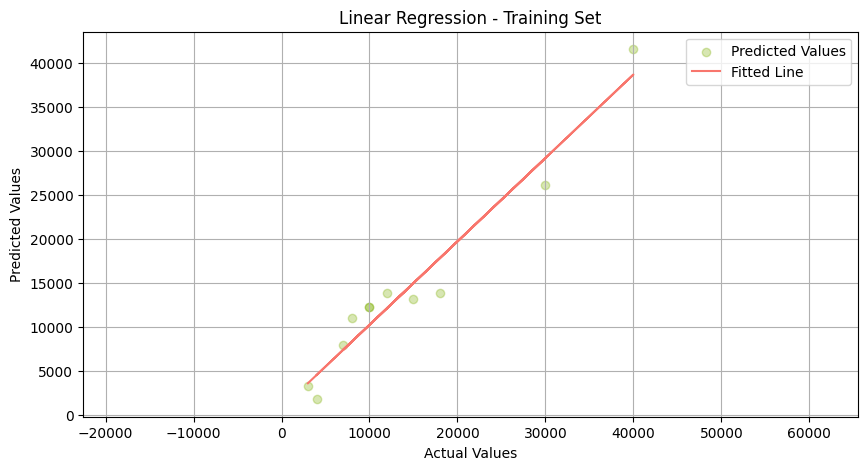

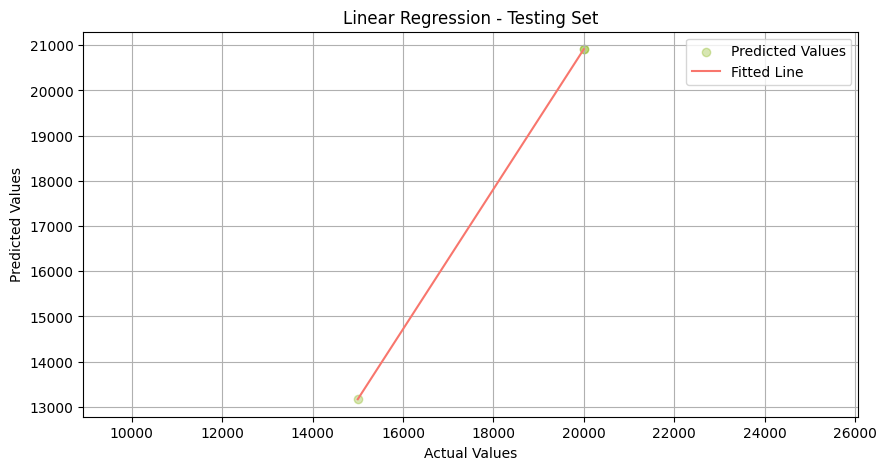

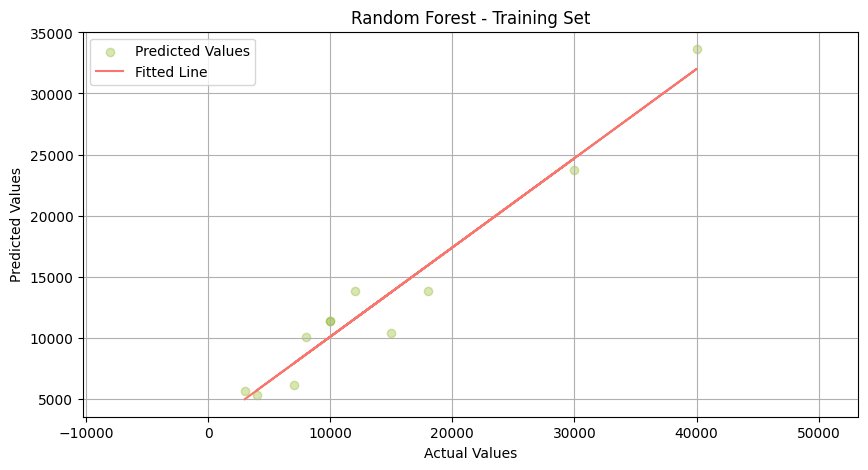

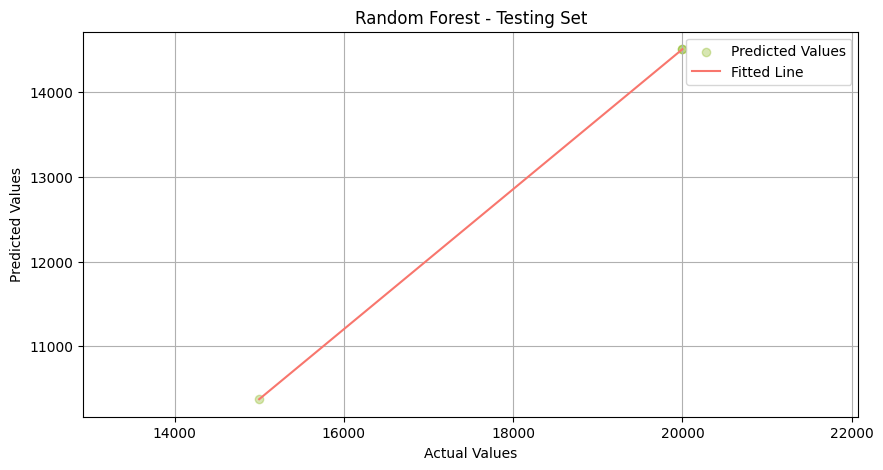

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create prediction plots
def plot_predictions(y_true, y_pred, model_name, dataset_type):
    plt.figure(figsize=(10, 5))
    plt.scatter(x=y_true, y=y_pred, alpha=0.3, c="#7CAE00", label='Predicted Values')

    # Fit a regression line to the data
    z = np.polyfit(y_true, y_pred, 1) # This can be linear (degree 1) or higher degree
    p = np.poly1d(z)

    # Plot the fitted line
    plt.plot(y_true, p(y_true), color='#f8766d', label='Fitted Line')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - {dataset_type}')
    plt.legend()
    plt.axis('equal')
    plt.grid()
    plt.show()

# Visualization for Linear Regression
plot_predictions(y_train, y_pred_lr_train, 'Linear Regression', 'Training Set')
plot_predictions(y_test, y_pred_lr_test, 'Linear Regression', 'Testing Set')

# Visualization for Random Forest
plot_predictions(y_train, y_pred_rf_train, 'Random Forest', 'Training Set')
plot_predictions(y_test, y_pred_rf_test, 'Random Forest', 'Testing Set')

# Plotting Linear Regression predictions vs Actual values
# plt.figure(figsize=(10,5))
# plt.subplot(1, 2, 1) # (1, 2) means 1 row and 2 columns, and (1) indicates that this is the first subplot.
# plt.scatter(x=y_test, y=y_pred_lr_test, color='blue', label='Predicted')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Actual') #It spans from the minimum actual cost to the maximum actual cost, indicating where predicted values would fall if they were exactly equal to the actual values.
# plt.xlabel('Actual Cost')
# plt.ylabel('Predicted Cost')
# plt.title('Linear Regression')
# plt.legend()

# # Plotting Random Forest predictions vs Actual values
# plt.subplot(1, 2, 2)
# plt.scatter(x=y_test, y=y_pred_lr_test, color='green', label='Predicted')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Actual')
# plt.xlabel('Actual Cost')
# plt.ylabel('Predicted Cost')
# plt.title('Random Forest')
# plt.legend()

# plt.tight_layout()
# plt.show()

#**Summary**



*   The code effectively creates a comparative visualization of the prediction accuracy for two different models: **Linear Regression** and **Random Forest**.

*   The scatter plots allow you to visually assess how well the predictions align with the actual costs. Ideally, points would lie **close** to the red diagonal line, indicating *accurate predictions*. If points are **far** from this line, it suggests *discrepancies between predicted and actual values*, which may point to areas for model improvement.

